FLUJO COMPRESIBLE
===
***

### Conceptos básicos
***

Decimos que un flujo es compresible cuando su variación de densidad no es menospreciable. 

El parámetro más importante es el **Número de Mach**, definido como 

$$
\text{Ma} = \frac{u}{c}
$$

donde $c$ es la velocidad del sonido, que se calcula, para un gas ideal como
$$
c = \sqrt{\gamma r T}
$$
donde $\gamma = \frac{c_p}{c_v}$ es el *coeficiente adiabátic* y $r=\frac{R}{m_\text{mol}}$ es la constante del gas.

Vamos a definir ya estos valores para los cálculos que vendrán más adelante

In [1]:
gamma = 1.4
r = 287

En base al valor de $\text{Ma}$ se definen diferentes tipos de flujo:

* $\text{Ma} < 0.3$ : Incompresible
* $0.3 < \text{Ma} < 0.8$ : Subsónico
* $0.8 < \text{Ma} < 1.2$ : Transónico
* $1.2 < \text{Ma} < 5$ : Supersónico
* $\text{Ma} > 5$ : Hipersónico

### Ecuación de Bernoulli para flujo compresible

La conservación de la energía, para flujo adiabático sin transferencia ni de calor ni trabajo lleva a 

$$
c_p T_0 = c_p T + \frac{1}{2}u^2
$$

y, adimensionalizando, a


\begin{equation}
\label{eq:EB}
\boxed{\frac{T_0}{T} = 1 + \frac{\gamma - 1}{2}\text{Ma}^2}
\end{equation}

Donde $T_0$ es la **temperatura total, de remanso o de estancamiento**. A partir de aqui se pueden también definir las presiones y densidad total con

\begin{equation}
\frac{p_0}{p} = \left( \frac{T_0}{T} \right)^\frac{\gamma}{\gamma-1} = \left( 1 + \frac{\gamma - 1}{2}\text{Ma}^2 \right)^\frac{\gamma}{\gamma-1} \\
\frac{\rho_0}{\rho} = \left( \frac{T_0}{T} \right)^\frac{1}{\gamma-1} = \left( 1 + \frac{\gamma - 1}{2}\text{Ma}^2 \right)^\frac{1}{\gamma-1}
\end{equation}



### Valores sónicos o críticos

Unos valores particularmente importantes de las magnitudes son los *valores sónicos o críticos* que se dan cuando $\text{Ma} = 1$

\begin{equation}
T^{*}=T_{0}\frac{2}{\gamma+1} \\ 
p^{*}=p_{0}\left(\frac{2}{\gamma+1}\right)^{\frac{\gamma}{\gamma-1}} \\
\rho^{*}=\rho_{0}\left(\frac{2}{\gamma+1}\right)^{\frac{1}{\gamma-1}}\\ 
c^{*}(=u^{*})=c_{0}\left(\frac{2}{\gamma+1}\right)^{\frac{1}{2}}
\end{equation}

### Flujo isentrópico en toberas

Considerando flujo estacionario y unidimensional, la condición de continuidad lleva a 

\begin{equation}
\rho(x)u(x)A(x) = \dot{m} \;( = \text{constante})
\end{equation}

![conducto1](conducto1.png)

Combinando esta condición con la ecuación de Euler y la compresibilidad del fluid ($\text{d}p = c^2 \text{d}\rho$), se llega a

\begin{equation}
\frac{\text d u}{u}=-\frac{\text d p}{\rho u^{2}}=\frac{1}{\text{Ma}^{2}-1}\frac{\text d A}{A}
\end{equation}

y esto lleva a que el comportamiento de una tobera convergente o divergente depende del valor de $\text{Ma}$

![toberas](toberas.png)

En condiciones críticas o sónicas, el flujo másico sigue siendo el mismo

\\[
\rho^{*}u^{*}A^{*}=\rho uA=\dot{m}\,\Rightarrow\frac{A}{A^{*}}=\frac{\rho^{*}u^{*}}{\rho u},
\\]

y esto conduce a una expresión para la relación entre el áera de un conducto y el área crítica en función de $\text{Ma}$

\\[
\boxed{\frac{A}{A^{*}}=\frac{1}{\text{Ma}}\left[\frac{2+(\gamma-1)\text{Ma}^{2}}{\gamma+1}\right]^{\frac{1}{2}\frac{(\gamma+1)}{(\gamma-1)}}}
\\]

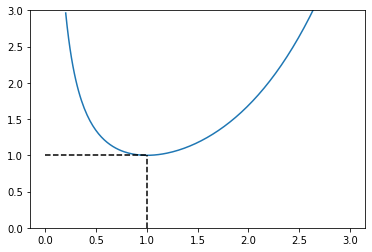

In [3]:
import numpy as np
import matplotlib.pyplot as plt
ma = np.linspace(0.2,3,num=200)
sovers_star=1/ma*((2+(gamma-1)*ma**2)/(gamma+1))**(0.5*(gamma+1)/(gamma-1))
plt.plot(ma,sovers_star);
plt.ylim(0,3);
plt.plot([0,1], [1,1], linestyle='--', color='black');
plt.plot([1,1], [0,1], linestyle='--', color='black');

Como se puede ver, la sección mínima de la tobera es la crítica cuando el flujo en ese punto tiene $\text{Ma} = 1$

### Concepto de bloqueo de flujo

Cuando en la garganta (sección mínima) hay flujo crítico (véase que en la garganta el flujo puede ser subsónico o sónico, pero no supersónico) el valor de éste es

\begin{equation}
\dot{m}=\rho^{*}u^{*}A^{*}= p_0\sqrt{\dfrac{\gamma}{rT_0}}\left( \dfrac{2}{\gamma+1}\right)^{\frac{1}{2}\frac{\gamma+1}{\gamma-1}}A^*
\end{equation}

Este valor es solo función de las condiciones totales. El ejemplo típico es el de flujo que parte de un depósito en condiciones de estancamiento y sale a través de una tobera. Si está bloqueado, el flujo másico no depende de la presión que encuentra en la salida, solo de $p_0$ y $T_0$.

### Funciones para python

Todas estas comprejas expresiones, y otras, se puede usar el paquete [scikit-aero](https://github.com/AeroPython/scikit-aero). Para instalarlo hay que ejecutar 

`pip install scikit-aero`

Por ejemplo:


In [4]:
# Importamos el modulo que nos interesa
from skaero.gasdynamics import isentropic

In [5]:
# Generamos el flujo isentropico
fl = isentropic.IsentropicFlow(gamma=gamma)

Y podemos calcular, por ejemplo, la relacion de presiones $\frac{p}{p_0}$ para $\text{Ma} = 2$

In [6]:
fl.p_p0(2)

0.12780452546295096

O la relación de áreas para este mismo $\text{Ma}$

In [7]:
fl.A_Astar(2)

1.6875000000000002

### Ejemplo
**Flujo isentrópico en tobera convergente-divergente**

Se considera una tobera por la que slae aire de un depósito. Las condiciones de remanso en el depósito son $p_0 = 1\,\text{MPa}$ y $T_0 = 800\,\text K$. La tobera tiene una garganta de sección $A_t = 20\,\text{cm}^2$ y en la sslida se tiene $\text{Ma} = 2$. Se pide:
1. Condiciones de flujo en la garganta
2. Condiciones de flujo en la salida
3. Flujo másico


**Resolución**
Las hipótesis que vamos a suar para resolver este problema son
1. Gas ideal
2. Flujo estacionario, unidimensional e isentrópico

En primer lugar, introducimos los datos y calculamos la densidad de remanso del aire en el depósito

In [53]:
Astar = 20e-4
Ma_e = 2
p0 = 1e6
T0 = 800
rho0 = p0/(r*T0)
print('rho_0 = %.2f kg/m³' %rho0)

rho_0 = 4.36 kg/m³


El flujo en la salida es supersónico. Por lo tanto en la garganta es sónico y el flujo *está bloqueado*. Las condiciones sónicas son

In [54]:
p_star = p0*fl.p_p0(1)
T_star = T0*fl.T_T0(1)
rho_star = p_star/(r*T_star)
v_star = np.sqrt(gamma*r*T_star)
print("p* = %.2f Pa" %p_star)
print("T* = %.2f K" %T_star)
print("rho* = %.2f kg/m³" %rho_star)
print("v* = %.2f m/s" %v_star)

p* = 528281.79 Pa
T* = 666.67 K
rho* = 2.76 kg/m³
v* = 517.56 m/s


Las condiciones en la salida se calculan a partir de la ecuación de Bernoulli, dado que el flujo es isentrópico

In [90]:
T_e = T0*fl.T_T0(Ma_e)
p_e = p0*fl.p_p0(Ma_e)
rho_e = p_e/(r*T_e)
print("p_e = %.2f Pa" %p_e)
print("T_e = %.2f K" %T_e)
print("rho_e = %.2f kg/m³" %rho_e)

p_e = 127804.53 Pa
T_e = 444.44 K
rho_e = 1.00 kg/m³


La velocidad a la salida la calculamos a partir de $\text{Ma}_e$ y la velocidad del sonido

In [56]:
v_e = Ma_e*np.sqrt(gamma*r*T_e)
print("v_e = %.2f m/s" %v_e)

v_e = 845.17 m/s


El área de la sección de salida la calulamos a partir del área crítica

In [57]:
A_e = Astar*fl.A_Astar(2)
print("A_e = %.2e m² = %.2f cm²" %(A_e,A_e*1e4))

A_e = 3.38e-03 m² = 33.75 cm²


Y el flujo másico lo podemos calcular a partir de las condiciones de salida

In [58]:
mdot_e = rho_e*v_e*A_e
print("Flujo másico en salida: mdot_e = %.2f kg/s" %mdot_e)

Flujo másico en salida: mdot_e = 2.86 kg/s


O bien en la garganta

In [59]:
mdot_star = rho_star*v_star*Astar
print("Flujo másico en gargata: mdot_star = %.2f kg/s" %mdot_star)

Flujo másico en gargata: mdot_star = 2.86 kg/s


que, evidentement, deben ser iguales.
***

## Ondas de choque normales

Pero, ¿qué pasa si la presión en la salida no es la calculada? 

En las condiciones calculadas en el ejemplo, se dice que la tobera esta **adaptada** o bien que está en **condiciones de diseño**. 

Si la presión en la salida es menor que la calculada, el flujo sigue expandiéndose en el exterior para adaptarse a la presión. Se producen las conocidas como *ondas de expansión*. 

Si la presión és mayor, el flujo debe comprimirse para adaptarse a esta presión. Esta compresión se realiza a través de una **onda de choque**. Si la presión no es lo bastante grande, la onda de choque es oblicua. Sin embargo, si la presión de salida és lo bastante grande, se produce en el interior de la tobera una **onda de choque normal**.

Esta figura se ha extraido del libro de [Kundu](https://discovery.upc.edu/iii/encore/record/C__Rb1412306?lang=cat)

![tobera_kundu](tobera_kundu.png)

En una onda de choque normal, la aplicación de la conservación de la masa, la cantidad de movimiento y la energía lleva al cálculo de la relación entre variación de densidad y variación de presión

\begin{equation}
\frac{\rho_{2}}{\rho_{1}}=\frac{1+\beta\frac{p_{2}}{p_{1}}}{\beta+\frac{p_{2}}{p_{1}}}\qquad\text{con }\beta=\frac{\gamma+1}{\gamma-1}
\end{equation}

De aqui se deduce que el flujo a través de una onda de choque normal no es isentópico ya que, en este caso la relación deberia ser, como sabemos, $\frac{\rho_{2}}{\rho_{1}}=\left(\frac{p_{2}}{p_{1}}\right)^{\frac{1}{\gamma}}$

La variación de entropia a través de una onda de choque normal es, de hecho,

\begin{equation}
\frac{s_{2}-s_{1}}{c_{v}}=\ln\left[\frac{p_{2}}{p_{1}}\left(\frac{\rho_{1}}{\rho_{2}}\right)^{\gamma}\right]=\ln\left[\frac{p_{2}}{p_{1}}\left(\frac{\beta+\frac{p_{2}}{p_{1}}}{1+\beta\frac{p_{2}}{p_{1}}}\right)^{\gamma}\right]
\end{equation}

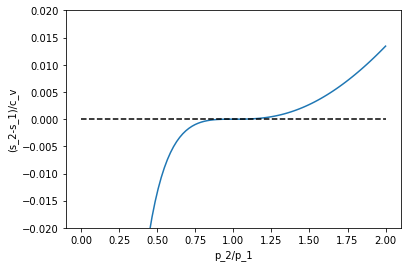

In [73]:
beta = (gamma+1)/(gamma-1)
p2_p1 = np.linspace(0.001,2,num=100)
s2_s1 = np.log(p2_p1*((beta+p2_p1)/(1+beta*p2_p1))**gamma)
plt.plot(p2_p1,s2_s1)
plt.ylim(-0.02,0.02)
plt.plot([0,2],[0,0],linestyle='--',color='black')
plt.xlabel('p_2/p_1')
plt.ylabel('(s_2-s_1)/c_v');

En esta figura vemos que para que el aumento de la entropia sea positivo es necesario que $p_2 > p_1$.

$\newcommand{\ma}{\text{Ma}}$
A partir de la adimensionalización de la relación entre presión dinámica y presión estática

$$
\frac{\rho u^{2}}{p}=\frac{u^{2}}{rT}=\frac{\gamma u^{2}}{\gamma rT}=\frac{\gamma u^{2}}{c^{2}}=\gamma\ma^{2}
$$

se puede calcular el valor 

$$
\frac{p_{2}}{p_{1}}=\frac{2\gamma\ma_{1}^{2}-(\gamma-1)}{\gamma+1}
$$

Text(0, 0.5, 'p_2/p_1')

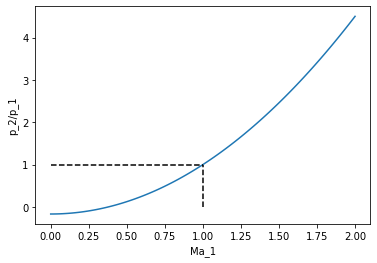

In [79]:
Ma1 = np.linspace(0,2,num=100)
p2_p1 = (2*gamma*Ma1**2-gamma+1)/(gamma+1)
plt.plot(Ma1,p2_p1)
plt.plot([0,1],[1,1],linestyle="--",color="black")
plt.plot([1,1],[0,1],linestyle="--",color="black")
plt.xlabel('Ma_1')
plt.ylabel('p_2/p_1')

Se observa que, para que $p_2$ sea mayor que $p_1$ es necesario que $\ma_2$ sea mayor que 1. Es decir, el fujo de entrada en una onda de choque normal siempre es **supersónico**.

Por otro lado, se puede calcular $\ma$ en la salida de la onda de choque

$$
\ma_{2}^{2}=\frac{(\gamma-1)\ma_{1}^{2}+2}{2\gamma\ma_{1}^{2}-(\gamma-1)}
$$

y se observa que para $\ma_1 > 1$ el denominador simpre es mayor que el numeriador y, por lo tanto, $\ma_2 <1$. Por lo tanto, en una de choque normal el flujo entrante es supersónico, y el saliente subsónico.

Otras relaciones importantes para una onda de choque normal son:

\begin{equation}
\frac{\rho_{2}}{\rho_{1}}=\frac{u_{1}}{u_{2}}=\frac{\left(\gamma+1\right)\ma_{1}^{2}}{\left(\gamma-1\right)\ma_{1}^{2}+2}
\\
\frac{T_{2}}{T_{1}}=\left(2+\left(\gamma-1\right)\ma_{1}^{2}\right)\frac{2\gamma\ma_{1}^{2}-\left(\gamma-1\right)}{\left(\gamma+1\right)^{2}\ma_{1}^{2}}
\\
\frac{p_{02}}{p_{01}}=\frac{\rho_{02}}{\rho_{01}}=\left(\frac{\left(\gamma+1\right)\ma_{1}^{2}}{2+\left(\gamma-1\right)\ma_{1}^{2}}\right)^{\frac{\gamma}{\gamma-1}}\left(\frac{\gamma+1}{2\gamma\ma_{1}^{2}-\left(\gamma-1\right)}\right)^{\frac{1}{\gamma-1}}
\end{equation}

Todas estas funciones las podemos encontrar en el paquete de scikit-aero

In [80]:
from skaero.gasdynamics import shocks

In [81]:
?shocks

Type:        module
String form: <module 'skaero.gasdynamics.shocks' from '/home/robert/anaconda3/lib/python3.7/site-packages/skaero/gasdynamics/shocks.py'>
File:        ~/anaconda3/lib/python3.7/site-packages/skaero/gasdynamics/shocks.py
Docstring:  
Shock waves.

Classes
-------
NormalShock(M_1, gamma)

Examples
--------
>>> from skaero.gasdynamics import shocks
>>> ns = shocks.NormalShock(1.4, 2.0)


In [82]:
# Por ejmplo, supongamos una onda de choque con un Mach de 1.6
ns = shocks.NormalShock(gamma=gamma,M_1=1.6)

In [83]:
# El Mach de salida seria
ns.M_2

0.6684373647831919

In [84]:
#La relación de presiones es 
ns.p2_p1

2.8200000000000003

Pero la versión actual de scikit-aero no tiene nada más. El resto de funciones las podemos definir nosotros mismos

### Ejemplo

Supongamos que en la tobera del ejemplo anterior, que tenia una presión en la salida

In [89]:
print("p_e = %.2f Pa" %p_e)

p_e = 127804.53 Pa


esta presión es aumentada hasta 

In [92]:
p_e = 600000
print("p_e = %.2f Pa" %p_e)

p_e = 600000.00 Pa


Se pide
1. Calcular la onda de choque: $\ma_1$, $\ma_2$ y área en la que se produce
2. Calcular las condiciones del flujo en la salida

Lo primero que hay que hacer es comprobar que hay una onda de choque. Si el flujo fuese isentrópico, con el área que tenemos en la salida, el número de mach subsónico en la salida sería

In [102]:
Ma_e_sub, Ma_e_super = \
    isentropic.mach_from_area_ratio(fl,A_ratio=A_e/Astar)
print("Número de Mach subsónico para salida para flujo isentrópico: %.3f" %Ma_e_sub)

Número de Mach subsónico para salida para flujo isentrópico: 0.372


Y para esta condición, la presión en la salida deberia ser

In [104]:
p_e_sub = p0*fl.p_p0(Ma_e_sub)
print("p_e_sub = %.2f Pa" %p_e_sub)

p_e_sub = 908757.99 Pa


que es mayor que los 6e5 Pa que tenemos. Asi que el flujo está bloqueado, y tenemos una onda de choque.

Tenemos que calcular primero la temperatura en la salida. De esta forma podremos calcular $\ma_e$ dado qe la temperatura total se conserva (no así la presión total)

Para calcular la temperatura del jet de salida usamos el flujo másico que, como está bloqueado es el mismo que teniamos antes (condiciones críticas) y, por lo tanto es conocido

$$
\dot{m} = A_e \rho_e v_e
$$

operando es posible ponerlo todo en términos de únicamente la temperatura y la presión

$$
\dot{m} = A_e p_e \sqrt{\frac{2}{\gamma-1}}
\sqrt{\frac{\gamma}{rT_e}\left(\frac{T_0}{T_e}-1\right)}
$$

Si invertimos esta expresión encontramos una ecuación de segundo grado para $\frac{1}{T_e}$. Resolviéndola y conservando sólo la solución positiva, se encuentra

$$
T_e = \frac{2T_0}{1+\sqrt{1+\frac{2rT_0(\gamma-1)}{\gamma}\left(\frac{\dot{m}}{A_e p_e}\right)^2}}
$$

In [113]:
# Esta expresión anterior la podemos poner en una función
def T_e(mdot,A_e,p_e):
    root = 1 + (2*r*T0*(gamma-1))/gamma*(mdot/(A_e*p_e))**2
    return 2*T0/(1+np.sqrt(root))

In [115]:
T_e=T_e(mdot_e,A_e,p_e)
print('T_e = %.2f K' %T_e)

T_e = 753.62 K


Con esta temperatura y la total, podemos calcular el mach en la salida, invirtiendo la ecuación de Bernoulli

In [117]:
from scipy.optimize import fsolve

In [150]:
#definimos la función que queremos resolver
def f(Ma):
    return T0*fl.T_T0(Ma)-T_e

In [151]:
# y calculamos el número de Mach para esta temperatura
Ma_e = fsolve(f,0.2)[0] # El 0.2 es un valor inicial para resolver iterativamente
                        # devuelve un array y nos quedamos con el primer
                        # elemento
print('Ma_e = %.3f '%Ma_e)

Ma_e = 0.555 


Y con este $\ma_e$ ya podemos calcular la presión total

In [152]:
p0_2 = p_e/fl.p_p0(Ma_e)
print('p0_2 = %.2f Pa'%p0_2)

p0_2 = 739502.70 Pa


Y tenemos una función que nos permite calcular la relación de presiones total en función del $\ma_1$ en la entrada de la onda de choque 

In [153]:
def p02_p01(Ma1):
    term1 = ((gamma+1)*Ma1**2/(2+(gamma-1)*Ma1**2))**(gamma/(gamma-1))
    term2 = ((gamma+1)/(2*gamma*Ma1**2-gamma+1))**(1/(gamma-1))
    return term1*term2

In [154]:
#De nuevo, definimos la ecuación que queremos resolver
def f(Ma1):
    return p0*p02_p01(Ma1)-p0_2

In [156]:
Ma1 = fsolve(f,1)[0]
print('El numero de Mach en la entrada de la onda de choque es')
print('Ma_1 = %.3f' %Ma1)

El numero de Mach en la entrada de la onda de choque es
Ma_1 = 1.960


El numero de Mach a la salida de lo onda de choque si lo podemos obtener de scikit-aero

In [161]:
ns = shocks.NormalShock(Ma1)
Ma2 = ns.M_2
print('El numero de Mach en la salida de la onda de choque es')
print('Ma_2 = %.3f' %Ma2)

El numero de Mach en la salida de la onda de choque es
Ma_2 = 0.584


y el área donde se produce la onda de choque es

In [163]:
A_c = Astar*fl.A_Astar(Ma1)
print("La onda de choque se produce en el conduto donde el área de la \
    sección es")
print("A_c = %.2e m² = %.2f cm²" %(A_c,A_c*1e4))

La onda de choque se produce en el conduto donde el área de la     sección es
A_c = 3.27e-03 m² = 32.65 cm²
